# **Benford Law**

---



Also known as the first digit rule. **Benford's law** states that the leading digit in many real-life sets of numerical data is likely to be small.  **The number 1** appears as the leading significant digit **roughly 30%** of the time in sets that respect the law, while 9 appears as the leading significant digit less than 5% of the time. The digits would appear roughly 11.1 percent of the time if they were dispersed evenly. Benford's law also predicts the distribution of second, third, and digit combinations, among other things.

In [1]:
#libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


## insert formulae here

In [2]:
#Creating the First digits & expected frequency distribution
data = {'leading_digit': [1, 2, 3, 4, 5, 6, 7, 8, 9] }
ben = pd.DataFrame(data,columns=['leading_digit'])
ben['Benford_Dist'] =(np.log10(1+(1/ben['leading_digit']))*100).round(2)
ben

,leading_digit,Benford_Dist
0,1,30.10
1,2,17.61
2,3,12.49
3,4,9.69
4,5,7.92
5,6,6.69
6,7,5.80
7,8,5.12
8,9,4.58


In [3]:
#Loading automobile sales dataset collected over a 3 year period
car_sales = pd.read_csv(r'C:\data_repo\benford_cars.csv',
                        usecols = ['Price', 'Mileage'] )
df = car_sales[(car_sales['Mileage']>0) & (car_sales['Price']>0)].copy()

us_covid = pd.read_csv(r"C:\Users\Conrad Mogane\Downloads\Monthly_Rates_of_Laboratory-Confirmed_COVID-19_Hospitalizations_from_the_COVID-NET_Surveillance_System.csv").fillna(0)
#us_covid.describe()
benconvid = us_covid[['MonthlyRate']].round(0)
benconvid = benconvid[benconvid['MonthlyRate'] !=0]


FileNotFoundError: [Errno 2] No such file or directory: 'C:\\data_repo\\benford_cars.csv'

create the first_digit function to extract the leading digit from a number then apply it to the Price and Mileage columns of the dataframe.


In [4]:
#Extracting lead digits

def first_digit(number):
    #this function extracts the first digit from a series
    #the does a frequency count of the digits and returns a percentage
    return (number.astype(str).str[0].value_counts(normalize=True).sort_index()*100).round(1)



In [ ]:
# Controlled experiment

In [5]:
us_bencov = pd.DataFrame(benconvid['MonthlyRate'].astype(str).str[0].value_counts(normalize=True).round(3).sort_index()*100).reset_index()
us_bencov.columns = ['lead_digit', 'us_bencov_freq']
us_bencov

ben_cars = df.apply(first_digit).reset_index()
ben_cars.columns = ['lead_digit', 'price_freq','mileage_freq']
ben_cars

NameError: name 'benconvid' is not defined

Text(0.5, 1.0, 'Benford Distribution')

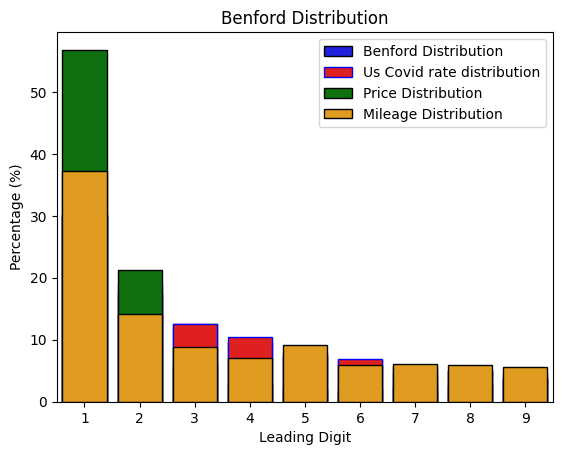

In [ ]:
#
sns.barplot(data=ben, x='leading_digit', y='Benford_Dist', color='blue',edgecolor='black', label='Benford Distribution')
sns.barplot(us_bencov, x= 'lead_digit',y ='us_bencov_freq', color='red',edgecolor='blue', label= 'Us Covid rate distribution')
sns.barplot(ben_cars, x='lead_digit', y='price_freq', color='green',edgecolor='black', label='Price Distribution')
sns.barplot(ben_cars, x='lead_digit', y='mileage_freq', color='orange',edgecolor='black', label='Mileage Distribution')
#sns.barplot(ben, x='leading_digit', y='Benford_Dist', color='white',edgecolor='black', label='Benford Distribution')
plt.xlabel('Leading Digit')
plt.ylabel('Percentage (%)')
plt.title('Benford Distributions of Leading Digits')
plt.legend(loc='upper right)
#plt.grid()

Chis-square for goodness of fit

Kolmogorov-smirnov (KS)

Z-Statistic

https://mathworld.wolfram.com/BenfordsLaw.html
def exclude_zeros(df, column):
    """
    Returns a DataFrame excluding rows where the specified column has zero.
    """
    return df[df[column] != 0]